<a href="https://colab.research.google.com/github/Allen001822480/Info7374SpringTeam5/blob/Assignment2/5.TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install keras
!pip install tensorflow

In [12]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded model from disk


In [13]:
for i in range(6):
    loaded_model.pop()
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
__________

In [0]:
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import os
import keras
import pandas as pd

seed = 10

def read_img(img_name):
    img64 = Image.open(img_name).convert('RGB')
    img32 = img64.resize((32, 32),Image.ANTIALIAS)
    data = np.array(img32)
    return data

images = []
labels = []
dir = 'tiny-imagenet-200/train/'
i = 0
for folder in os.listdir(dir):
    folderpath = dir + folder +'/images/'
    for file in os.listdir(folderpath):
        if file.endswith('.JPEG'):
            filedir = folderpath + file
            images.append(read_img(filedir))
            labels.append(i)
    i = i+1

np.random.seed(seed)
num_classes = 200
x = np.array(images)
y = np.array(labels)
y = keras.utils.to_categorical(y, num_classes)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

Using TensorFlow backend.


In [0]:
extracted_features = loaded_model.predict(x_train)
print(extracted_features.shape)

(70000, 2, 2, 128)


In [0]:
validation_features = loaded_model.predict(x_test)
print(validation_features.shape)

(30000, 2, 2, 128)


In [0]:
print(y_test.shape)

(30000, 200)


In [0]:
from keras import models
from keras import optimizers
from keras.layers import Dense, Dropout,Conv2D, Activation, Flatten, BatchNormalization, MaxPooling2D

model = models.Sequential()
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(extracted_features,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(validation_features,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 70000 samples, validate on 30000 samples
Epoch 1/100
70000/70000 [==============================] - 12s 169us/step - loss: 5.1125 - acc: 0.0322 - val_loss: 4.8137 - val_acc: 0.0561
Epoch 2/100
70000/70000 [==============================] - 11s 156us/step - loss: 4.6197 - acc: 0.0656 - val_loss: 4.4755 - val_acc: 0.0790
Epoch 3/100
70000/70000 [==============================] - 11s 156us/step - loss: 4.4128 - acc: 0.0809 - val_loss: 4.3446 - val_acc: 0.0911
Epoch 4/100
70000/70000 [==============================] - 11s 156us/step - loss: 4.3172 - acc: 0.0944 - val_loss: 4.2636 - val_acc: 0.1017
Epoch 5/100
70000/70000 [==============================] - 11s 157us/step - loss: 4.2387 - acc: 0.1054 - val_loss: 4.1993 - val_acc: 0.1108
Epoch 6/100
70000/70000 [==============================] - 11s 157us/step - loss: 4.1791 - acc: 0.1141 - val_loss: 4.1440 - val_acc: 0.1214
Epoch 7/100
70000/70000 [==============================] - 11s

In [0]:
import matplotlib.pyplot as plt

def plothistory(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

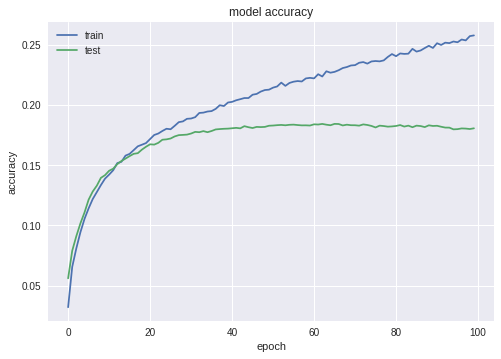

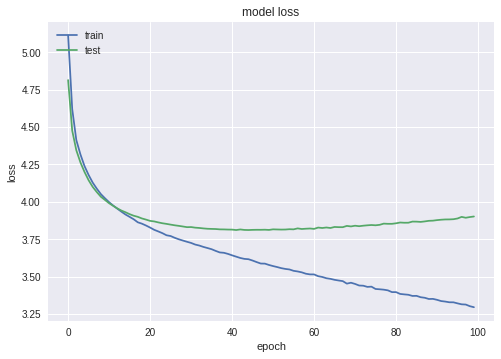

In [0]:
plothistory(history)

In [0]:
from keras.applications import VGG16
 
vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

In [0]:
vgg_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [0]:
extracted_features2 = vgg_conv.predict(x_train)
print(extracted_features2.shape)

(70000, 1, 1, 512)


In [0]:
validation_features2 = vgg_conv.predict(x_test)
print(validation_features2.shape)

(30000, 1, 1, 512)


In [0]:
model = models.Sequential()

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history2 = model.fit(extracted_features2,
                    y_train,
                    epochs=100,
                    batch_size=256,
                    validation_data=(validation_features2,y_test))

Train on 70000 samples, validate on 30000 samples
Epoch 1/100
70000/70000 [==============================] - 2s 34us/step - loss: 15.5575 - acc: 0.0117 - val_loss: 14.6460 - val_acc: 0.0370
Epoch 2/100
70000/70000 [==============================] - 2s 24us/step - loss: 14.7580 - acc: 0.0313 - val_loss: 12.9237 - val_acc: 0.0612
Epoch 3/100
70000/70000 [==============================] - 2s 24us/step - loss: 10.2545 - acc: 0.0370 - val_loss: 5.6347 - val_acc: 0.0428
Epoch 4/100
70000/70000 [==============================] - 2s 24us/step - loss: 5.5379 - acc: 0.0329 - val_loss: 5.1092 - val_acc: 0.0510
Epoch 5/100
70000/70000 [==============================] - 2s 24us/step - loss: 5.1564 - acc: 0.0492 - val_loss: 4.9263 - val_acc: 0.0711
Epoch 6/100
70000/70000 [==============================] - 2s 24us/step - loss: 4.9776 - acc: 0.0648 - val_loss: 4.7910 - val_acc: 0.0861
Epoch 7/100
70000/70000 [==============================] - 2s 25us/step - loss: 4.8369 - acc: 0.0768 - val_loss: 4.68

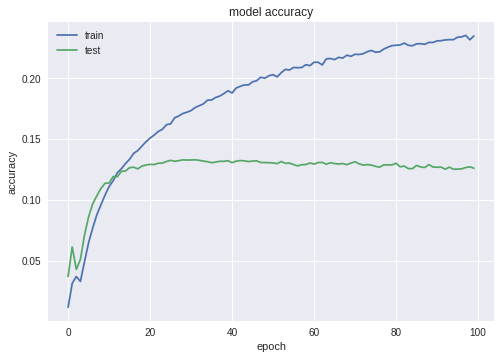

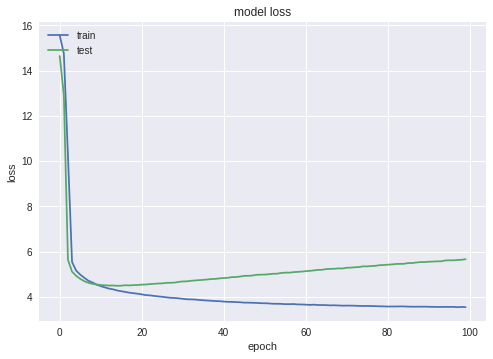

In [0]:
plothistory(history2)

In [0]:
#y_test = pd.read_csv('tiny-imagenet-200/val/val_annotations.txt' , sep = '\s+', header = None)

In [0]:
'''
y_test = y_test[:][1]
y_test = np.array(y_test)
print(y_test.shape)
'''

In [0]:
'''
test_images = []

for file in os.listdir('tiny-imagenet-200/val/images'):
        if file.endswith('.JPEG'):
            filedir = 'tiny-imagenet-200/val/images/' + file
            test_images.append(read_img(filedir))
'''

In [0]:
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import os
import keras
import pandas as pd

seed = 10

def read_img(img_name):
    img64 = Image.open(img_name).convert('RGB')
    img32 = img64.resize((32, 32),Image.ANTIALIAS)
    data = np.array(img32)
    return data

images = []
labels = []
dir = 'tiny-imagenet-200/train/'
i = 0
for folder in os.listdir(dir):
    folderpath = dir + folder +'/images/'
    for file in os.listdir(folderpath):
        if file.endswith('.JPEG'):
            filedir = folderpath + file
            images.append(read_img(filedir))
            labels.append(i)
    i = i+1

np.random.seed(seed)
num_classes = 200
x = np.array(images)
y = np.array(labels)
y = keras.utils.to_categorical(y, num_classes)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)

In [0]:
extracted_features3 = loaded_model.predict(x_train)

In [0]:
validation_features3 = loaded_model.predict(x_test)

In [16]:
from keras import models
from keras import optimizers
from keras.layers import Dense, Dropout,Conv2D, Activation, Flatten, BatchNormalization, MaxPooling2D

model = models.Sequential()
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history3 = model.fit(extracted_features3,
                    y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(validation_features3, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 90000 samples, validate on 10000 samples
Epoch 1/100
90000/90000 [==============================] - 4s 40us/step - loss: 5.2339 - acc: 0.0264 - val_loss: 5.1121 - val_acc: 0.0470
Epoch 2/100
90000/90000 [==============================] - 3s 36us/step - loss: 4.9303 - acc: 0.0505 - val_loss: 4.7743 - val_acc: 0.0633
Epoch 3/100
90000/90000 [==============================] - 3s 36us/step - loss: 4.6530 - acc: 0.0654 - val_loss: 4.5643 - val_acc: 0.0787
Epoch 4/100
90000/90000 [==============================] - 3s 36us/step - loss: 4.5016 - acc: 0.0761 - val_loss: 4.4517 - val_acc: 0.0847
Epoch 5/100
90000/90000 [==============================] - 3s 35us/step - loss: 4.4138 - acc: 0.0828 - val_loss: 4.3787 - val_acc: 0.0894
Epoch 6/100
90000/90000 [==============================] - 3s 36us/step - loss: 4.3528 - acc: 0.0900 - val_loss: 4.3231 - val_acc: 0.0971
Epoch 7/100
90000/90000 [==============================] - 3s 35us/step - 

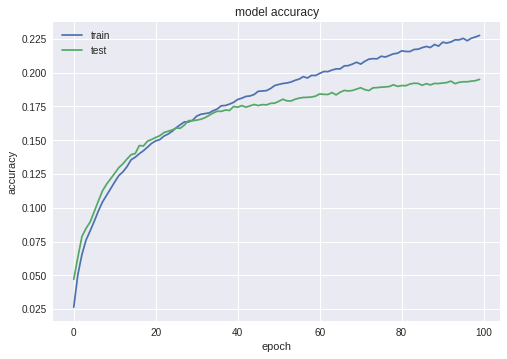

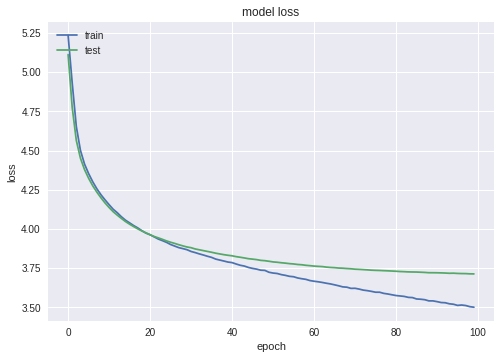

In [20]:
plothistory(history3)

In [24]:
model = models.Sequential()
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_test,y_test))

Train on 90000 samples, validate on 10000 samples
Epoch 1/100
90000/90000 [==============================] - 18s 196us/step - loss: 16.0362 - acc: 0.0051 - val_loss: 16.0488 - val_acc: 0.0043
Epoch 2/100
90000/90000 [==============================] - 17s 193us/step - loss: 16.0363 - acc: 0.0051 - val_loss: 16.0488 - val_acc: 0.0043
Epoch 3/100
90000/90000 [==============================] - 17s 192us/step - loss: 16.0350 - acc: 0.0051 - val_loss: 16.0488 - val_acc: 0.0043
Epoch 4/100
90000/90000 [==============================] - 17s 194us/step - loss: 16.0377 - acc: 0.0050 - val_loss: 16.0423 - val_acc: 0.0047
Epoch 5/100
90000/90000 [==============================] - 17s 192us/step - loss: 16.0362 - acc: 0.0051 - val_loss: 16.0423 - val_acc: 0.0047
Epoch 6/100
90000/90000 [==============================] - 17s 192us/step - loss: 16.0366 - acc: 0.0051 - val_loss: 16.0423 - val_acc: 0.0047
Epoch 7/100
90000/90000 [==============================] - 17s 192us/step - loss: 16.0368 - acc: 0

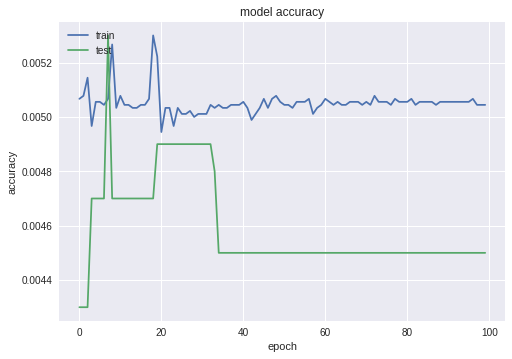

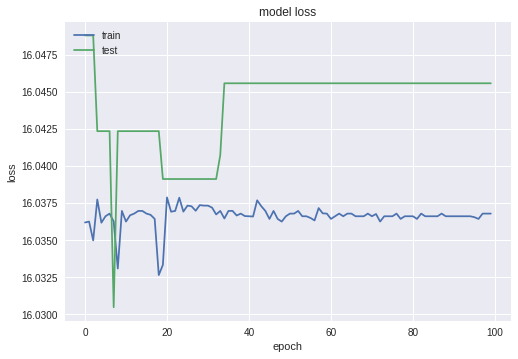

In [25]:
plothistory(history)